In [343]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preparation and Cleaning

In [344]:
# importing data
train = pd.read_csv('train.csv')
train_labels = pd.read_csv('trainLabels.csv')
test = pd.read_csv('test.csv') 

In [345]:
# checking training data headers
train.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [346]:
# checking testing data headers
test.head()

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


<AxesSubplot:>

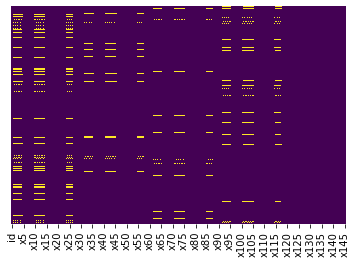

In [347]:
# visualizing missing training data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

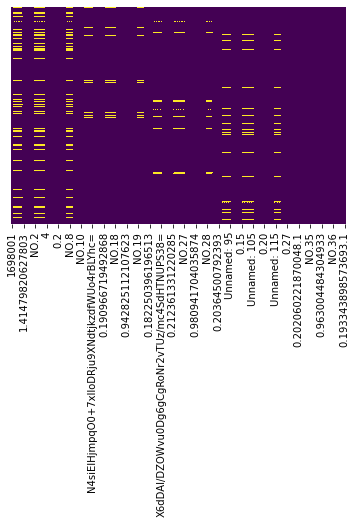

In [348]:
# visualizing missing testing data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [349]:
# filling the missing values with mean and removing redundant features from training data
# replacing 'YES', 'NO' values by '1' and '0'

#train.isnull().sum()
#train = train.dropna()
train = train.drop(['id','x3','x4'],axis=1)
train = train.replace(('YES','NO'),(1,0))
train = train.fillna(train.mean())
train.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,0.000000,0.000000,0.576561,0.073139,0.481394,0.115697,0.472474,1.000000,0.000000,0.000000,...,0.0,0.810,3306,4676,1,0,1,2,0.375535,0.464610
1,0.098449,0.061239,0.000000,0.000000,0.000000,0.000000,0.000000,0.376764,0.023096,0.362417,...,0.0,0.510,4678,3306,1,0,1,4,0.741682,0.593630
2,0.000000,0.000000,1.341803,0.051422,0.935572,0.041440,0.501710,0.000000,0.000000,1.000000,...,0.0,0.850,4678,3306,0,0,0,1,0.776467,0.493159
3,1.000000,0.000000,0.653912,0.041471,0.940787,0.090851,0.556564,1.000000,0.000000,0.000000,...,0.0,0.945,3306,4678,0,0,1,3,0.168234,0.546582
4,0.000000,0.000000,1.415919,0.000000,1.000000,0.000000,0.375297,0.000000,0.000000,1.000000,...,0.0,1.000,1263,892,0,0,0,1,0.246637,0.361045


In [350]:
# finding the 'object' values in the training data
train.select_dtypes(include=['object']).columns.tolist()

['x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95']

In [351]:
# further dropping redundant columns from training data to get the final data
train = train.drop(['x34', 'x35', 'x61', 'x64', 'x65', 'x91', 'x94', 'x95'],axis=1)
train.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,0.000000,0.000000,0.576561,0.073139,0.481394,0.115697,0.472474,1.000000,0.000000,0.000000,...,0.0,0.810,3306,4676,1,0,1,2,0.375535,0.464610
1,0.098449,0.061239,0.000000,0.000000,0.000000,0.000000,0.000000,0.376764,0.023096,0.362417,...,0.0,0.510,4678,3306,1,0,1,4,0.741682,0.593630
2,0.000000,0.000000,1.341803,0.051422,0.935572,0.041440,0.501710,0.000000,0.000000,1.000000,...,0.0,0.850,4678,3306,0,0,0,1,0.776467,0.493159
3,1.000000,0.000000,0.653912,0.041471,0.940787,0.090851,0.556564,1.000000,0.000000,0.000000,...,0.0,0.945,3306,4678,0,0,1,3,0.168234,0.546582
4,0.000000,0.000000,1.415919,0.000000,1.000000,0.000000,0.375297,0.000000,0.000000,1.000000,...,0.0,1.000,1263,892,0,0,0,1,0.246637,0.361045


In [352]:
# # filling the missing values with mean and removing redundant features from testing data
# replacing 'YES', 'NO' values by '1' and '0'

#test = test.dropna()
test = test.drop(['1698001','5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=','FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8='],axis=1)
test = test.replace(('YES','NO'),(1,0))
test = test.fillna(test.mean())
test.head()

,NO,NO.1,1.41479820627803,0,1,0.1,0.202060221870048,NO.2,NO.3,NO.4,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,0.000000,0.00000,0.832679,0.049834,0.945938,0.317427,0.482021,1.000000,0.000000,0.000000,...,1.0,0.866667,4672,3311,0,0,0,5,0.945032,0.471318
1,0.000000,0.00000,1.415919,0.000000,1.000000,0.000000,0.703088,0.000000,0.000000,1.000000,...,-1.0,1.000000,1263,892,0,0,0,8,0.557175,0.693587
2,0.092082,0.06217,0.000000,0.000000,0.000000,0.000000,0.000000,0.379472,0.021114,0.356598,...,0.0,0.870000,4672,3306,1,0,1,0,0.870538,0.405822
3,0.000000,0.00000,1.129212,0.087020,0.814240,1.112804,0.874318,0.000000,0.000000,0.000000,...,0.0,0.870000,4400,3413,1,0,1,2,0.224729,0.870909
4,0.000000,0.00000,1.415919,0.000000,1.000000,0.000000,0.232779,0.000000,0.000000,1.000000,...,0.0,1.000000,1263,892,1,0,1,6,0.536996,0.223278


In [353]:
# finding the 'object' values in the training data
test.select_dtypes(include=['object']).columns.tolist()

['rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=',
 'N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=',
 'PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=',
 'RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=',
 'X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=',
 '2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=',
 'Unnamed: 94',
 'Unnamed: 95']

In [354]:
# further dropping redundant columns from testing data to get the final data
test = test.drop(['rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=','N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=',
                  'PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=','RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=',
                  'X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=','2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=',
                  'Unnamed: 94','Unnamed: 95'],axis=1)
test.head()

,NO,NO.1,1.41479820627803,0,1,0.1,0.202060221870048,NO.2,NO.3,NO.4,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,0.000000,0.00000,0.832679,0.049834,0.945938,0.317427,0.482021,1.000000,0.000000,0.000000,...,1.0,0.866667,4672,3311,0,0,0,5,0.945032,0.471318
1,0.000000,0.00000,1.415919,0.000000,1.000000,0.000000,0.703088,0.000000,0.000000,1.000000,...,-1.0,1.000000,1263,892,0,0,0,8,0.557175,0.693587
2,0.092082,0.06217,0.000000,0.000000,0.000000,0.000000,0.000000,0.379472,0.021114,0.356598,...,0.0,0.870000,4672,3306,1,0,1,0,0.870538,0.405822
3,0.000000,0.00000,1.129212,0.087020,0.814240,1.112804,0.874318,0.000000,0.000000,0.000000,...,0.0,0.870000,4400,3413,1,0,1,2,0.224729,0.870909
4,0.000000,0.00000,1.415919,0.000000,1.000000,0.000000,0.232779,0.000000,0.000000,1.000000,...,0.0,1.000000,1263,892,1,0,1,6,0.536996,0.223278


In [374]:
test.columns

Index(['NO', 'NO.1', '1.41479820627803', '0', '1', '0.1', '0.202060221870048',
       'NO.2', 'NO.3', 'NO.4',
       ...
       '0.30', '1.8', '1262.3', '892.3', 'NO.36', 'NO.37', 'NO.38', '0.31',
       '0.0896860986547085', '0.193343898573693.1'],
      dtype='object', length=135)

In [355]:
# converting categorical features into dummy variables in the training dataset
#train_dummies = pd.get_dummies(train, columns = ['x1','x2','x10','x11','x12','x13','x14','x24','x25','x26','x30',
#                                      'x31','x32','x33','x34','x35','x41','x42','x43','x44','x45','x55','x56','x57',
#                                      'x61','x62','x63','x64','x65','x71','x72','x73','x74','x75','x85','x86','x87',
#                                      'x91','x92','x93','x94','x95','x101','x102','x103','x104','x105','x115','x116',
#                                      'x117','x126','x127','x128','x129','x130','x140','x141','x142'], drop_first=True)
# Concatenating new columns to original dataframe in training data
#train = pd.concat([train, train_dummies], axis=1)
#train.head()

In [356]:
# Dropping corresponding categorical columns from the training data to get the final training data
#train.drop(['x1','x2','x10','x11','x12','x13','x14','x24','x25','x26','x30',
#            'x31','x32','x33','x34','x35','x41','x42','x43','x44','x45','x55','x56','x57',
#            'x61','x62','x63','x64','x65','x71','x72','x73','x74','x75','x85','x86','x87',
#            'x91','x92','x93','x94','x95','x101','x102','x103','x104','x105','x115','x116',
#            'x117','x126','x127','x128','x129','x130','x140','x141','x142'], inplace=True, axis=1)
#train.head() 

In [357]:
# converting categorical features into dummy variables in the testing dataset
#test_dummies = pd.get_dummies(test, columns = ['NO','NO.1','NO.2','NO.3','NO.4','NO.5','NO.6','NO.7','NO.8','NO.9','NO.10',
#                                               'NO.11','NO.12','NO.13','rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=',
#                                               'N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=','NO.14','NO.15','NO.16','NO.17',
#                                               'NO.18','NO.19','NO.20','NO.21','PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=',
#                                               'NO.22','NO.23','RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=',
#                                               'X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=','NO.24','NO.25','YES','NO.26',
#                                               'NO.27','NO.28','NO.29','NO.30','2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=',
#                                               'Unnamed: 92','Unnamed: 93','Unnamed: 94','Unnamed: 95','Unnamed: 101',
#                                               'Unnamed: 102','Unnamed: 103','Unnamed: 104','Unnamed: 105','Unnamed: 115',
#                                               'Unnamed: 116','Unnamed: 117','NO.31','NO.32','NO.33','NO.34','NO.35','NO.36',
#                                               'NO.37','NO.38'], drop_first=True)
# Concatenating new columns to original dataframe in testing data
#test = pd.concat([test, test_dummies], axis=1)
#test.head()

In [358]:
# Dropping corresponding categorical columns from the testing data to get the final testing data
#test.drop(['NO','NO.1','NO.2','NO.3','NO.4','NO.5','NO.6','NO.7','NO.8','NO.9','NO.10',
#           'NO.11','NO.12','NO.13','rkfeWAP0Q1zsdn6lMJMLNghvsCa1rgbNDCSjW9SQhSg=',
#           'N4siEIHjmpqO0+7xIloDRju9XNdtjkzdfWUo4rBLYhc=','NO.14','NO.15','NO.16','NO.17',
#           'NO.18','NO.19','NO.20','NO.21','PrEvffTOaU/EQzH67SC94Xdz0Y/HKUjZzaRoh1CnRm8=',
#           'NO.22','NO.23','RxUzVvqZo40kN7065ZcLrk8so8ZQCcoUoSNWMZo1+EY=',
#           'X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=','NO.24','NO.25','YES','NO.26',
#           'NO.27','NO.28','NO.29','NO.30','2Y4EGKrRgHpO6rMmxhFTTj71p+jvsblepe/APAM9nkU=',
#           'Unnamed: 92','Unnamed: 93','Unnamed: 94','Unnamed: 95','Unnamed: 101',
#           'Unnamed: 102','Unnamed: 103','Unnamed: 104','Unnamed: 105','Unnamed: 115',
#           'Unnamed: 116','Unnamed: 117','NO.31','NO.32','NO.33','NO.34','NO.35','NO.36',
#           'NO.37','NO.38'], inplace=True, axis=1)
#test.head() 

In [359]:
train_labels = train_labels.drop('id', axis=1)
train_labels.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [360]:
print('Training Data Shape :',train.shape)
print('\nTraining Labels Shape :',train_labels.shape)
print('\nTesting Data Shape :',test.shape)

Training Data Shape : (9999, 135)

Training Labels Shape : (49999, 33)

Testing Data Shape : (1999, 135)


In [361]:
# slicing the training labels to match the training data dimensions 
train_labels = train_labels[:9999]
print('\nTraining Labels Shape :',train_labels.shape)


Training Labels Shape : (9999, 33)


## Model Preparation and Prediction using Random Forest Classifier

In [362]:
X_train = train

In [363]:
X_test = test

In [364]:
y_train = train_labels

In [365]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [366]:
rfc_pred = rfc.predict(X_test)

## Saving Predictions to a csv file

In [375]:
import csv
final_pred = rfc_pred.flatten()

out_ids = []
for i in range(rfc_pred.shape[0]):
    for j in range(rfc_pred.shape[1]):
        pred_id = str(i+1) + '_y' + str(j)
        out_ids.append(pred_id)
    
final_data = list(zip(out_ids, final_pred))

id_label = pd.DataFrame({'id_label': out_ids})
pred = pd.DataFrame({'pred': final_pred})

det = pd.concat([id_label, pred], join = 'outer', axis = 1)
det.to_csv("Submission.csv", index=False)
